In [2]:
# A couple examples of approximating lines using Least-Squares
#
# Let's say you have a number of points = [(1, 1), (2, 4), (7,10)]. It's
# clear that these points don't all fall on the same line. To solve, let's
# convert to a matrix. The equation for a line is y = mx + b, therefore:
#
#                      (Matrix A) * [m, b] = y
#
#                   | 1 + 1 |            | 1 |
#                   | 2 + 1 | * | m | =  | 4 |  
#                   | 7 + 1 |   | b |    | 7 |
#
# Solving this with least-squares, where A = matrix x and dots '.' represent
# matrix multiplication -> Inverse(Transpose(A).A).Transpose(A).b

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import linalg
import numpy as np

In [4]:
x = np.array([1, 2, 7])
a = np.array([[1, 1], [2, 1], [7, 1]])
y = np.array([1, 4, 10])

In [5]:
# x values that'll give you projection y onto A
x_star = np.dot(np.dot(linalg.inv(np.dot(np.transpose(a), a)),np.transpose(a)), y)

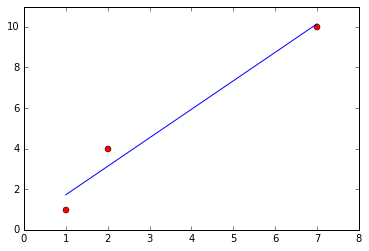

In [6]:
# calculate new y values that'll form a line
new_y = np.dot(a, x_star)

plt.plot(x, y, 'ro', x, new_y, 'b-')
plt.xlim(0, 8)
plt.ylim(0, 11)
plt.show()

In [7]:
# Now try the same thing with points that don't look linear
x = np.array([-2, -1, 1, 2, 3])
y = np.array([5, 1, 1, 4, 7])

# zip 2 lists together
def zip_lists(x, y):
    if (not x) and (not y):
        return []
    else:
        hd_x, tl_x = x[0], x[1:]
        hd_y, tl_y = y[0], y[1:]
        r = (zip_lists (tl_x, tl_y))
        if not r:
            return [[hd_x, hd_y]]
        else:
            return (([[hd_x, hd_y]]) + r)

# create matrix A =[c1*x^2, c2*x, c3]
a = np.insert(np.array(zip_lists(np.square(x).tolist(), x.tolist())), [2], [1], axis=1)

In [8]:
x_star = np.dot(np.dot(linalg.inv(np.dot(np.transpose(a), a)),np.transpose(a)), y)

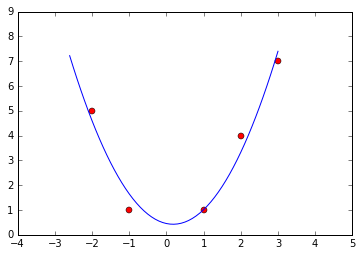

In [15]:
def quad(x):
    return x_star[0]*x**2 + x_star[1]*x+x_star[2]
    
quad_vec = np.vectorize(quad)

# create x values
full_x = np.arange(-2.6, 3.1, .1)
# create y values with the coefficients you created through least-squares; x_star
full_y = quad_vec(full_x)

plt.plot(x, y, 'ro',full_x, full_y, 'b-')
plt.xlim(-4, 5)
plt.ylim(0, 9)
plt.show()